In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('./Files')
import macroC as mC
%matplotlib inline

In [12]:
# Definimos si va a ser archivo de minimización de H o de free energy, el sistema a estudiar y si es con o sin shots.
spins=7
func='FE' # 'H'/'FE'
shots=0
method='SLSQP' # 'SLSQP'/'COBYLA'
layers=1

# Definimos el tipo de truncación para el que vamos a representar.
typetrunc='Trunc4' # types=['NoTrunc','Trunc1','Trunc2','Trunc3','Trunc4']

typetrunc=typetrunc+'/'


# Definimos la lista de J que vamos a comparar.
Jlist=[20,60,100,175,250]
namelist=[str(spins)+'SpinsCN-J='+str(J) for J in Jlist]

In [13]:
if shots==0:
    shots=None
directory= './Data/'+func+'/'+typetrunc
filelist=[directory+name+'-'+method+'-'+'Layers='+str(layers)+'-'+'Shots='+str(shots)+'.dat' for name in namelist]

N_sites=spins

In [14]:
# Creamos las listas vacías de los datos que vamos a leer
data=[]
dataj=[]
for j in range(len(Jlist)):
    dataj=[i.strip().split() for i in open(filelist[j]).readlines()]
    data.append(dataj)

In [15]:
nbetas=[len(data[j]) for j in range(len(Jlist))]
betas=[[float(data[j][i][0]) for i in range(nbetas[j])] for j in range(len(Jlist))]
sortindex=[np.argsort(betas[i]) for i in range(len(Jlist))]
betas=[np.sort(betas[j]) for j in range(len(Jlist))]
overlaps=[[float(data[j][sortindex[j][i]][1]) for i in range(nbetas[j])] for j in range(len(Jlist))]
niter=[[float(data[j][sortindex[j][i]][2]) for i in range(nbetas[j])] for j in range(len(Jlist))]
times=[[float(data[j][sortindex[j][i]][3]) for i in range(nbetas[j])] for j in range(len(Jlist))]

energies=[]
for j in range(len(Jlist)):
    energj=[]
    for k in range(nbetas[j]):
        energjk=[float(data[j][sortindex[j][k]][i+4]) for i in range(int(2**N_sites))]
        energj.append(energjk)
    energies.append(energj)

In [16]:
labellist=['J='+str(J) for J in Jlist]

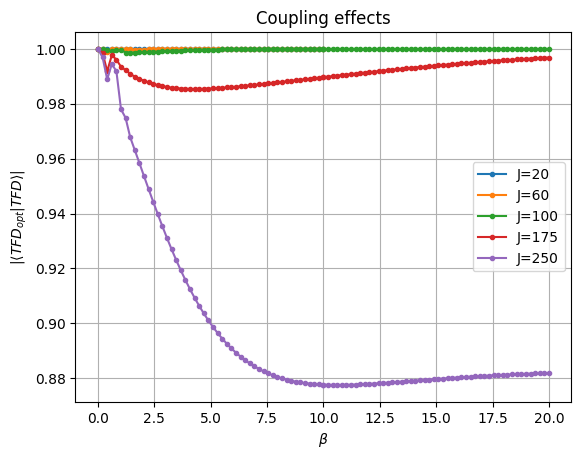

In [17]:
for i in range(len(Jlist)):
    plt.plot(betas[i], overlaps[i], '.-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$|\langle TFD_{opt} | TFD \rangle|$')
plt.title('Coupling effects')
plt.legend(loc='right')
plt.grid()
plt.show()

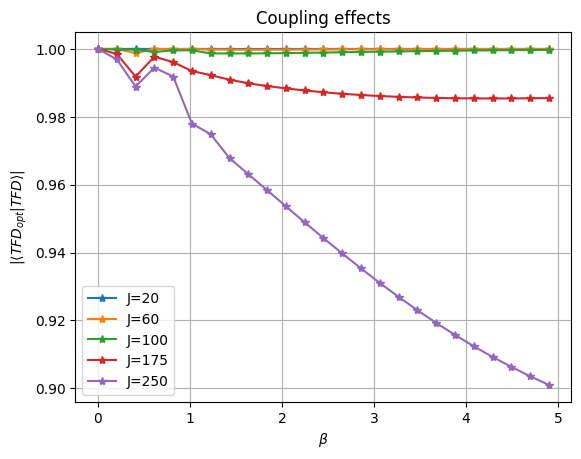

In [18]:
for i in range(len(Jlist)):
    plt.plot(betas[i][:25], overlaps[i][:25], '*-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$|\langle TFD_{opt} | TFD \rangle|$')
plt.title('Coupling effects')
plt.legend()
plt.grid()
plt.show()

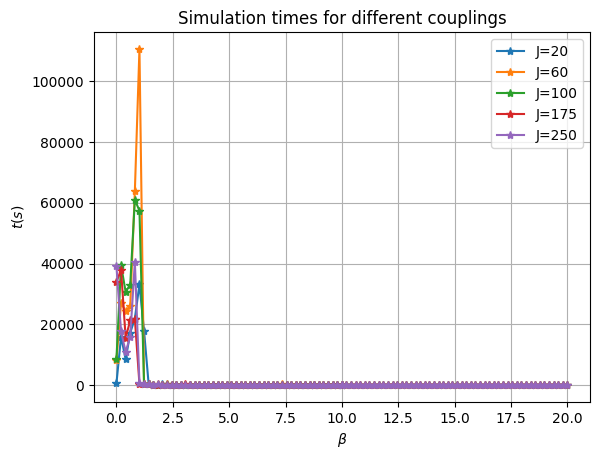

In [19]:
for i in range(len(Jlist)):
    plt.plot(betas[i], times[i], '*-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$t (s)$')
plt.title('Simulation times for different couplings')
plt.legend()
plt.grid()
plt.show()

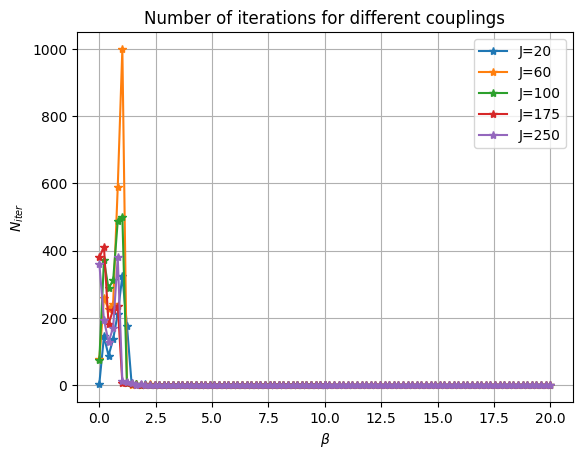

In [20]:
for i in range(len(Jlist)):
    plt.plot(betas[i], niter[i], '*-', label=labellist[i])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N_{iter}$')
plt.title('Number of iterations for different couplings')
plt.legend()
plt.grid()
plt.show()